In [1]:
# Paso 1: Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Paso 2: Cargar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
sns.set(style="whitegrid")


In [3]:
# Paso 3: Cargar el dataset desde Google Drive
ruta = '/content/drive/MyDrive/Prediccion de Diabetes - Proyecto Analitica/proyecto-diabetes-analitica/Datos/diabetes_prediction_dataset.csv'
df = pd.read_csv(ruta)

# Ver las primeras filas
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
# Paso 4: Información general del dataset
print("Forma del dataset:", df.shape)
df.info()


Forma del dataset: (100000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
# Paso 5: Estadísticas descriptivas
df.describe()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
# Paso 6: Revisar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


Distribución de la variable objetivo:
diabetes
0    91500
1     8500
Name: count, dtype: int64


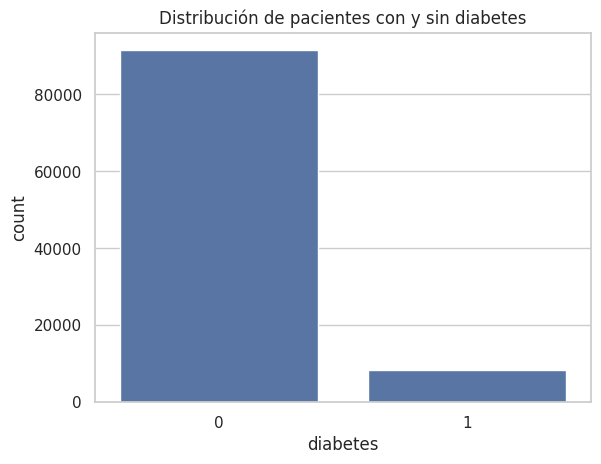

In [7]:
# Paso 7: Distribución de la variable objetivo
print("Distribución de la variable objetivo:")
print(df['diabetes'].value_counts())
sns.countplot(data=df, x='diabetes')
plt.title("Distribución de pacientes con y sin diabetes")
plt.show()


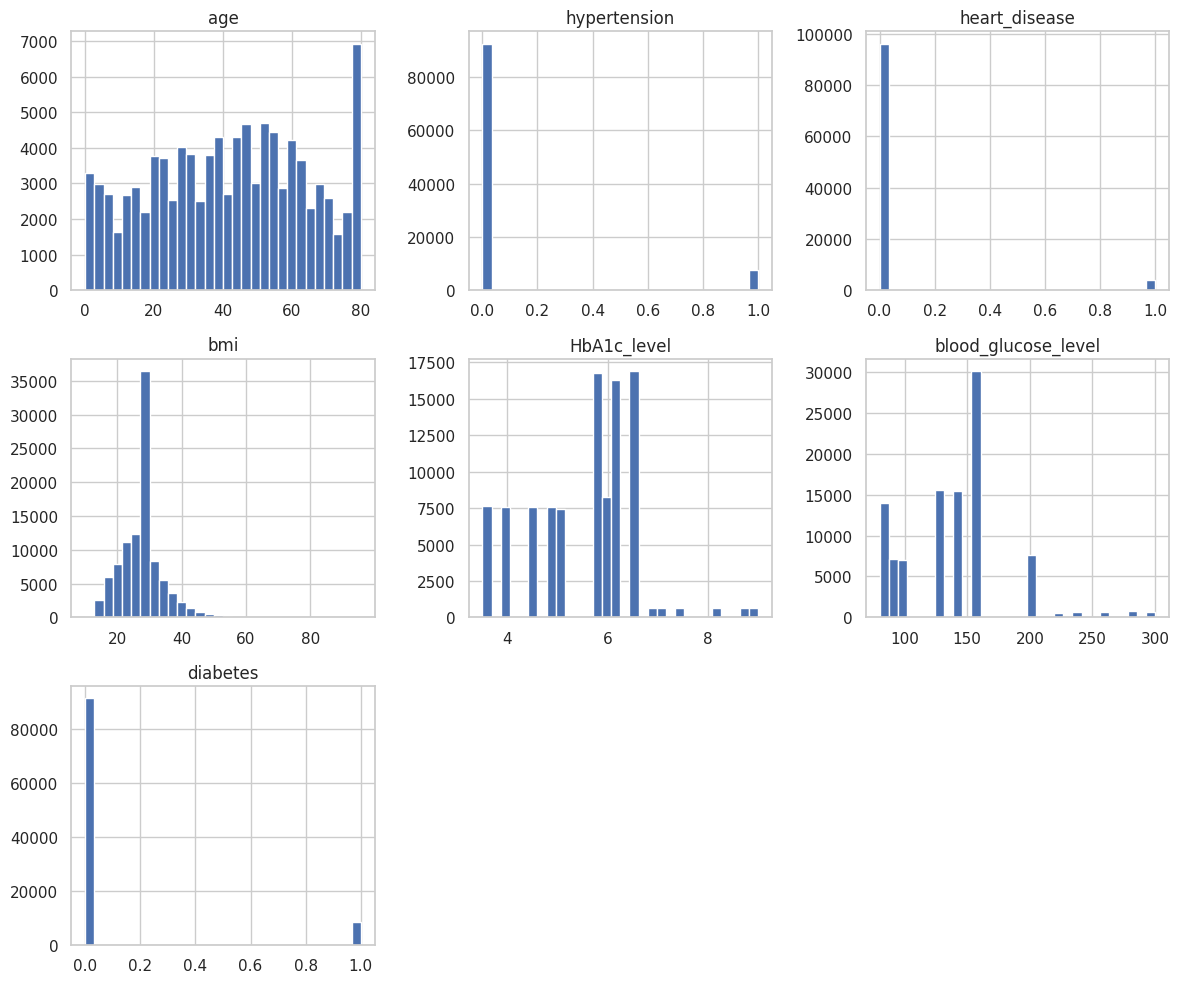

In [8]:
# Paso 8: Visualización de variables numéricas
columnas_numericas = df.select_dtypes(include=np.number).columns

df[columnas_numericas].hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()


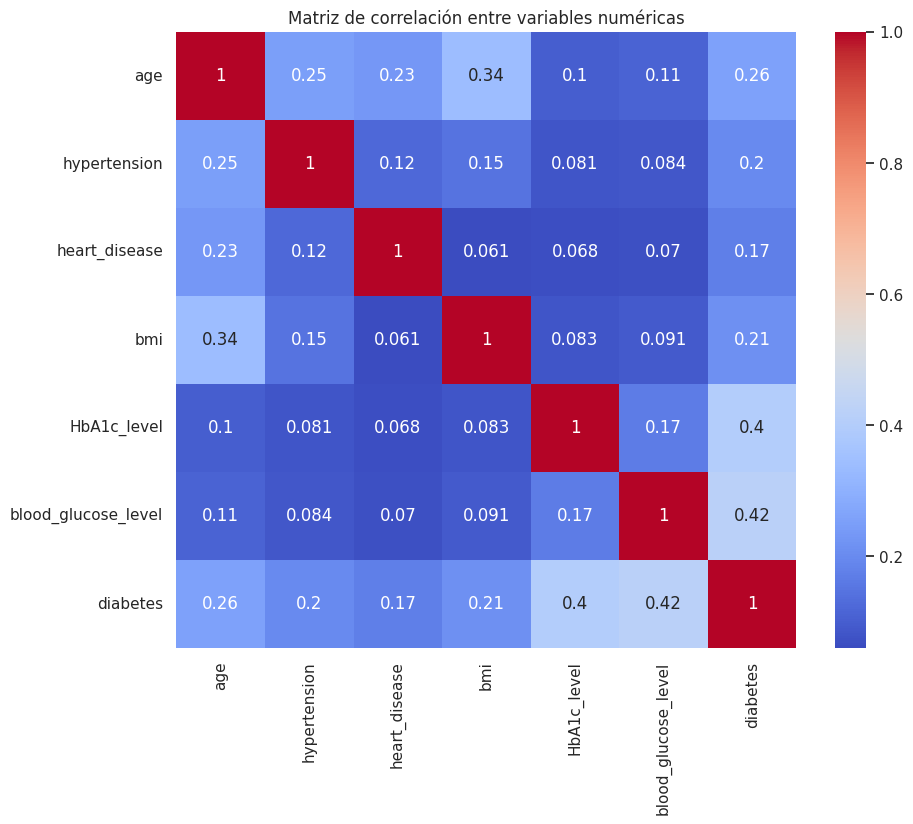

In [9]:
# Paso 9: Matriz de correlación
# Seleccionar solo las columnas numéricas
df_numerico = df.select_dtypes(include=[np.number])

# Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación entre variables numéricas")
plt.show()



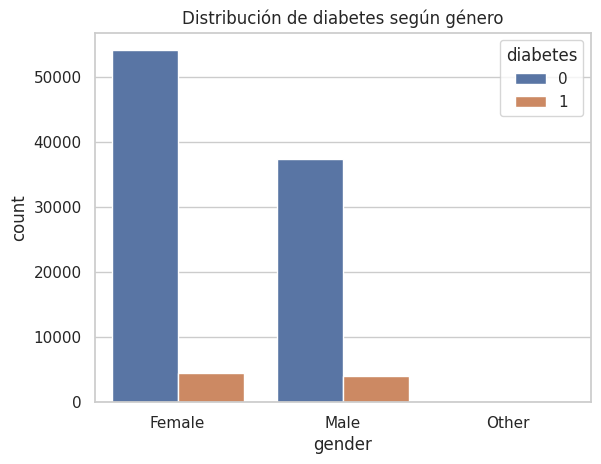

diabetes,0,1
gender,,
Female,92.381131,7.618869
Male,90.251026,9.748974
Other,100.000000,0.000000


In [10]:
# Distribución de diabetes según género
sns.countplot(data=df, x='gender', hue='diabetes')
plt.title("Distribución de diabetes según género")
plt.show()

# Tabla cruzada
pd.crosstab(df['gender'], df['diabetes'], normalize='index') * 100


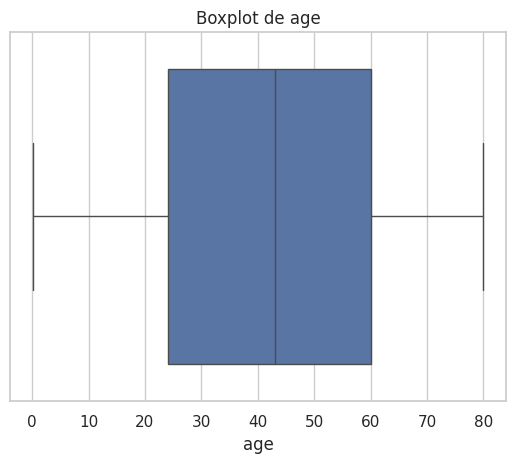

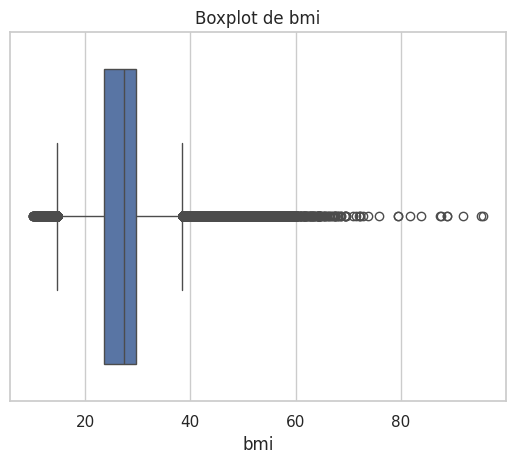

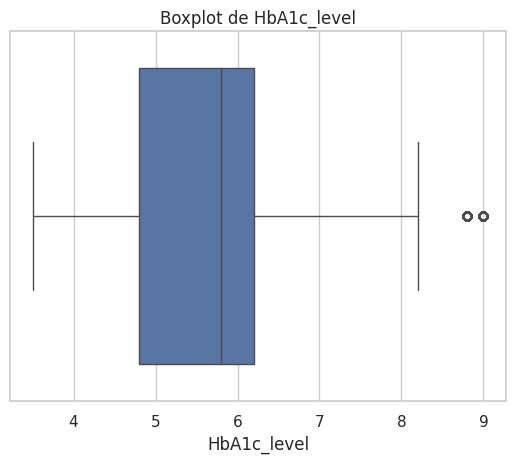

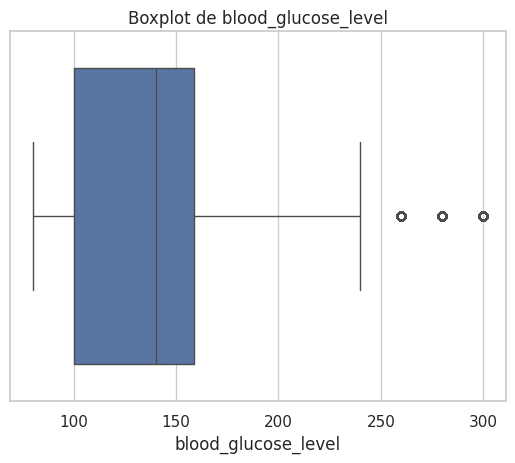

In [11]:
# Paso 10: Boxplots para detectar outliers
for col in ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']:
    plt.figure()
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot de {col}")
    plt.show()


In [12]:
# revisar valores únicos antes de codificar
print(df['gender'].unique())
print(df['smoking_history'].unique())


['Female' 'Male' 'Other']
['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [13]:
#Paso 11: Codificación de variables categóricas
df = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)


In [14]:
df['diabetes'].value_counts(normalize=True)


,proportion
diabetes,
0,0.915
1,0.085


In [15]:
#Paso 12: Guardar dataset limpio para modelado
ruta_salida = '/content/drive/MyDrive/Prediccion de Diabetes - Proyecto Analitica/proyecto-diabetes-analitica/Datos/dataset_limpio.csv'
df.to_csv(ruta_salida, index=False)
